<a href="https://colab.research.google.com/github/marudengi/practice-for-kaggle/blob/main/Property_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Files

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pwd

'/content'

In [2]:
!ls

gdrive	sample_data


In [3]:
!ls -lha kaggle.json

ls: cannot access 'kaggle.json': No such file or directory


In [4]:
!mkdir -p ./kaggle
!cp gdrive/MyDrive/kaggle.json ./kaggle

In [5]:
!chmod 600 ./kaggle/kaggle.json

In [6]:
!mkdir -p ~/.kaggle/
!cp gdrive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls

gdrive	kaggle	sample_data


In [8]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         99           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        209           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        483           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       3295           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      26603            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       6702            True  
connectx

In [9]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 7.21MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 62.6MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 60.3MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 30.1MB/s]


In [ ]:
!ls

data_description.txt  kaggle	   sample_submission.csv  train.csv
gdrive		      sample_data  test.csv


# 2. Import

In [378]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
%matplotlib inline

In [379]:
train = pd.read_csv('train.csv')

In [380]:
test = pd.read_csv('test.csv')

In [381]:
sample = pd.read_csv('sample_submission.csv')

In [382]:
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [383]:
train_target = train['SalePrice']
train.drop('SalePrice',axis=1,inplace=True)

In [384]:
train.drop('Id',axis=1,inplace=True)

In [385]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,N

In [386]:
train_test = [train,test]
train_test

[      MSSubClass MSZoning  LotFrontage  ...  YrSold SaleType SaleCondition
 0             60       RL         65.0  ...    2008       WD        Normal
 1             20       RL         80.0  ...    2007       WD        Normal
 2             60       RL         68.0  ...    2008       WD        Normal
 3             70       RL         60.0  ...    2006       WD       Abnorml
 4             60       RL         84.0  ...    2008       WD        Normal
 ...          ...      ...          ...  ...     ...      ...           ...
 1455          60       RL         62.0  ...    2007       WD        Normal
 1456          20       RL         85.0  ...    2010       WD        Normal
 1457          70       RL         66.0  ...    2010       WD        Normal
 1458          20       RL         68.0  ...    2010       WD        Normal
 1459          20       RL         75.0  ...    2008       WD        Normal
 
 [1460 rows x 79 columns],
         Id  MSSubClass MSZoning  ...  YrSold  SaleType Sal

In [387]:
for dataset in train_test:
  print(dataset.isna().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


#3. Filling Nan

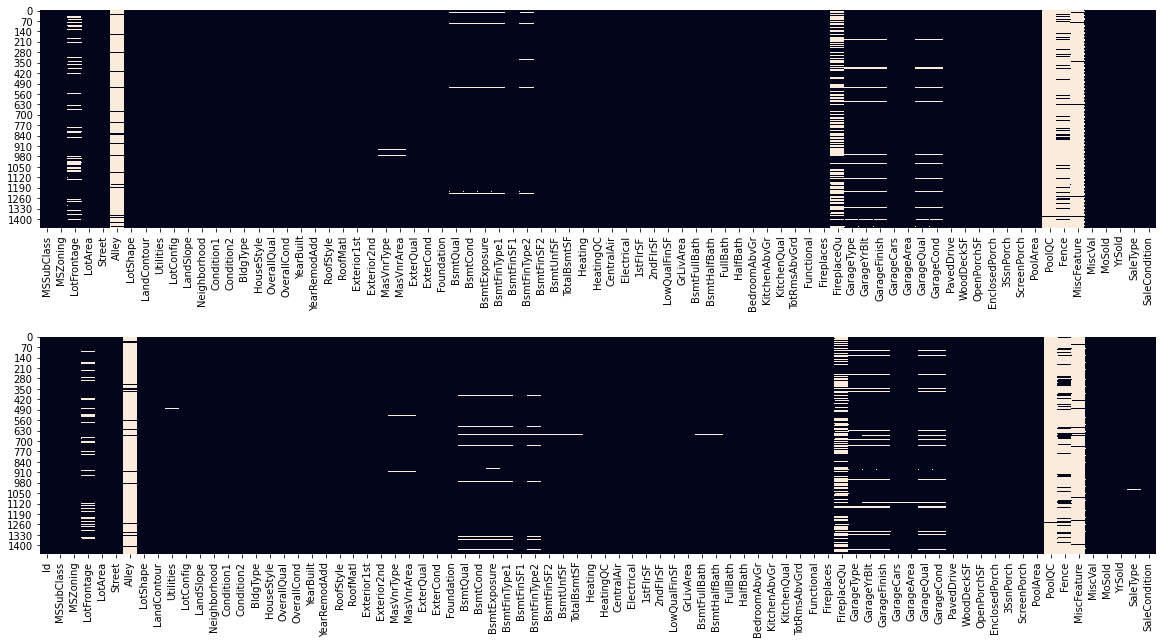

In [388]:
f,ax = plt.subplots(2,1,figsize=(20,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
sns.heatmap(train_test[0].isna(), cbar=False,ax=ax[0])
sns.heatmap(train_test[1].isna(), cbar=False,ax=ax[1])

In [389]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [390]:
test['LotFrontage'].value_counts()

60.0     133
80.0      68
70.0      63
50.0      60
75.0      52
        ... 
22.0       1
136.0      1
149.0      1
31.0       1
131.0      1
Name: LotFrontage, Length: 115, dtype: int64

fill test na data with median

In [391]:
for dataset in train_test:
  for idx, col in enumerate(dataset):
    if dataset[col].isna().sum():
      if str(dataset[col].value_counts().index[0]).isalpha():
        dataset[col].fillna(dataset[col].describe().top, inplace=True)
      else:
        dataset[col].fillna(dataset[col].median(), inplace=True)

In [392]:
for dataset in train_test:
  print(dataset.isna().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


# 4. EDA

In [393]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Gd,Attchd,1950.0,Unf,1,240,TA,TA,Y,366

In [394]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Gd,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Gd,Attchd,1979.0,Unf,0.0,0.0,TA,TA,Y,0,0,0,0,0,0,Ex,MnPrv,Shed,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,Gd,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,Ex,MnPrv,Shed,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,Ex,MnPrv,Shed,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1

In [395]:
train_target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [396]:
train_target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

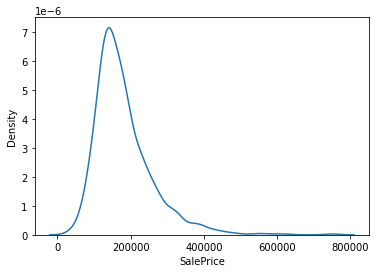

In [397]:
sns.kdeplot(train_target)

In [398]:
train.columns.nunique()

79

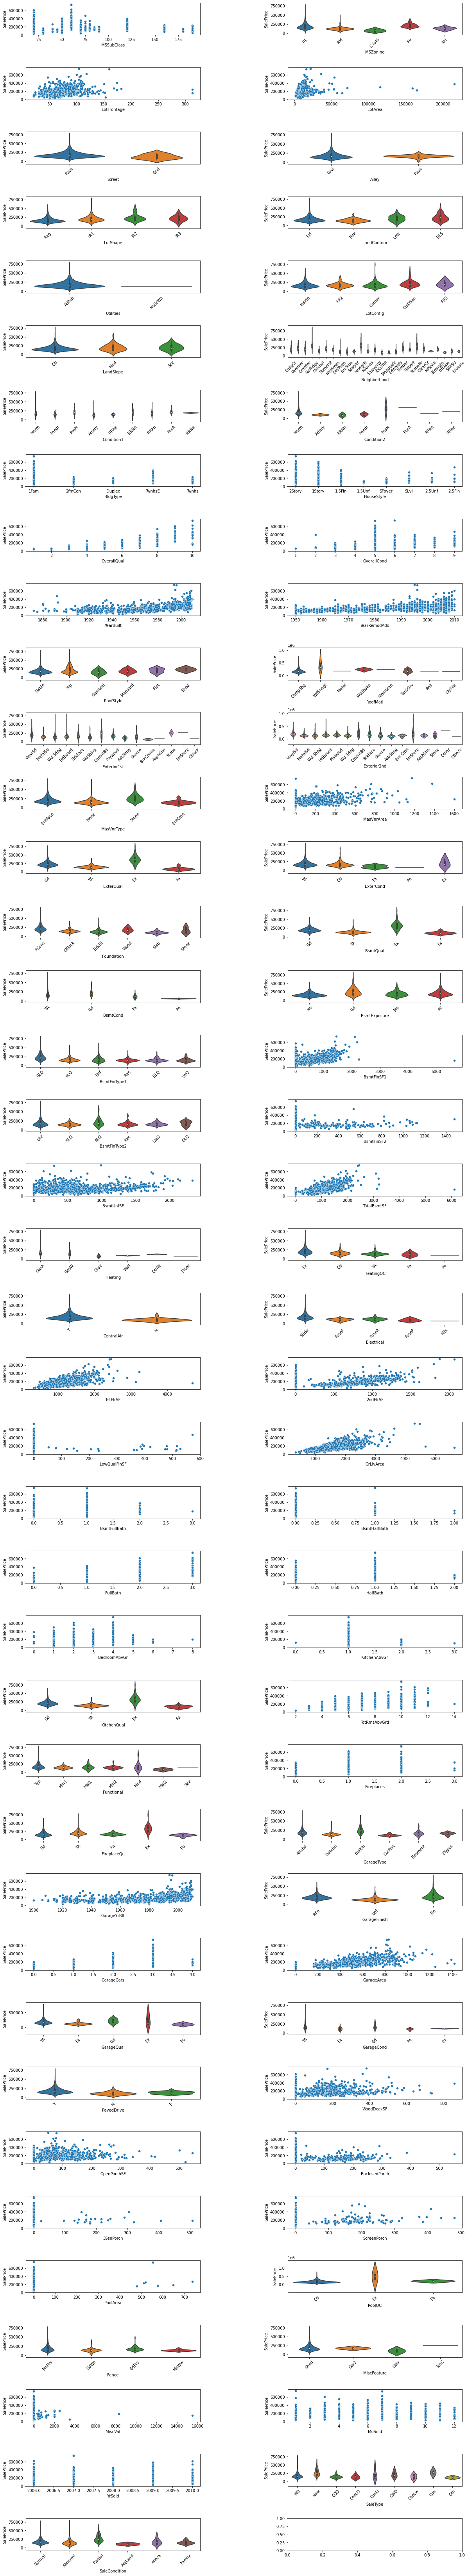

In [399]:
f, ax = plt.subplots(40,2,figsize=(20,120))
plt.subplots_adjust(wspace=0.5,hspace=1)

for idx, col in enumerate(train):

  if str(train.loc[0,col]).isalpha():
    ax[idx//2,idx%2].tick_params(axis='x',rotation=45)
    sns.violinplot(train[col],train_target,ax=ax[idx//2,idx%2])    
  else:
    sns.scatterplot(train[col],train_target,ax=ax[idx//2,idx%2])
plt.show()

#Feature Engineering

Retry to combine test and train data (need to fix 03/26)

##continuous data

###LotArea

In [400]:
for data in train_test:
  print(data['LotArea'].describe())

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
count     1459.000000
mean      9819.161069
std       4955.517327
min       1470.000000
25%       7391.000000
50%       9399.000000
75%      11517.500000
max      56600.000000
Name: LotArea, dtype: float64


In [401]:
train['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [402]:
for dataset in train_test:
  dataset.loc[(dataset['LotArea'] < dataset['LotArea'].describe()[4]),'NewLotArea'] = 1.2
  dataset.loc[(dataset['LotArea'] >= dataset['LotArea'].describe()[4]) & (dataset['LotArea'] < dataset['LotArea'].describe()[5]),'NewLotArea'] = 1.4
  dataset.loc[(dataset['LotArea'] >= dataset['LotArea'].describe()[5]) & (dataset['LotArea'] < dataset['LotArea'].describe()[6]), 'NewLotArea'] = 1.6
  dataset.loc[(dataset['LotArea'] >= dataset['LotArea'].describe()[6]),'NewLotArea'] = 1.8

In [403]:
train['NewLotArea']

0       1.4
1       1.6
2       1.6
3       1.6
4       1.8
       ... 
1455    1.4
1456    1.8
1457    1.4
1458    1.6
1459    1.6
Name: NewLotArea, Length: 1460, dtype: float64

###OverallQual

In [404]:
train['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

Looks like rating score so keep data as it is

###YearBuilt

In [405]:
train['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [406]:
for dataset in train_test:
  dataset.loc[(dataset['YearBuilt'] < dataset['YearBuilt'].describe()[4]),'NewYearBuilt'] = 1.2
  dataset.loc[(dataset['YearBuilt'] >= dataset['YearBuilt'].describe()[4]) & (dataset['YearBuilt'] < dataset['YearBuilt'].describe()[5]),'NewYearBuilt'] = 1.4
  dataset.loc[(dataset['YearBuilt'] >= dataset['YearBuilt'].describe()[5]) & (dataset['YearBuilt'] < dataset['YearBuilt'].describe()[6]), 'NewYearBuilt'] = 1.6
  dataset.loc[(dataset['YearBuilt'] >= dataset['YearBuilt'].describe()[6]),'NewYearBuilt'] = 1.8

In [407]:
train['NewYearBuilt']

0       1.8
1       1.6
2       1.8
3       1.2
4       1.8
       ... 
1455    1.6
1456    1.6
1457    1.2
1458    1.2
1459    1.4
Name: NewYearBuilt, Length: 1460, dtype: float64

###YearRemodAdd

In [408]:
train['YearRemodAdd'].describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [409]:
for dataset in train_test:
  dataset.loc[(dataset['YearRemodAdd'] < dataset['YearRemodAdd'].describe()[4]),'NewYearRemodAdd'] = 1.2
  dataset.loc[(dataset['YearRemodAdd'] >= dataset['YearRemodAdd'].describe()[4]) & (dataset['YearRemodAdd'] < dataset['YearRemodAdd'].describe()[5]),'NewYearRemodAdd'] = 1.4
  dataset.loc[(dataset['YearRemodAdd'] >= dataset['YearRemodAdd'].describe()[5]) & (dataset['YearRemodAdd'] < dataset['YearRemodAdd'].describe()[6]), 'NewYearRemodAdd'] = 1.6
  dataset.loc[(dataset['YearRemodAdd'] >= dataset['YearRemodAdd'].describe()[6]),'NewYearRemodAdd'] = 1.8

In [410]:
train['NewYearRemodAdd'].describe()

count    1460.000000
mean        1.502055
std         0.225018
min         1.200000
25%         1.400000
50%         1.600000
75%         1.800000
max         1.800000
Name: NewYearRemodAdd, dtype: float64

###2ndFlrSF

In [411]:
for dataset in train_test:
  print(dataset['2ndFlrSF'].describe())

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64
count    1459.000000
mean      325.967786
std       420.610226
min         0.000000
25%         0.000000
50%         0.000000
75%       676.000000
max      1862.000000
Name: 2ndFlrSF, dtype: float64


In [412]:
for dataset in train_test:
  dataset.loc[(dataset['2ndFlrSF'] <= dataset['2ndFlrSF'].describe()[5]),'New2ndFlrSF'] = 1.0
  dataset.loc[(dataset['2ndFlrSF'] > dataset['2ndFlrSF'].describe()[5]),'New2ndFlrSF'] = 1.2

In [413]:
train['New2ndFlrSF'].value_counts()

1.0    829
1.2    631
Name: New2ndFlrSF, dtype: int64

###FullBath

In [414]:
train['FullBath'].describe()

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64

It means number of bathroom keep as it is

##categorical data

###Street

In [415]:
for dataset in train_test:
  print(dataset['Street'].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
Pave    1453
Grvl       6
Name: Street, dtype: int64


In [416]:
for dataset in train_test:
  dataset.loc[dataset['Street'] == 'Pave' ,'NewStreet'] = 1
  dataset.loc[dataset['Street'] == 'Grvl', 'NewStreet'] = 0

In [417]:
for dataset in train_test:
  print(dataset['NewStreet'])

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1455    1.0
1456    1.0
1457    1.0
1458    1.0
1459    1.0
Name: NewStreet, Length: 1460, dtype: float64
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1454    1.0
1455    1.0
1456    1.0
1457    1.0
1458    1.0
Name: NewStreet, Length: 1459, dtype: float64


###Utilities

In [418]:
for dataset in train_test:
  print(train['Utilities'].value_counts())

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [419]:
for dataset in train_test:
  dataset.loc[dataset['Utilities'] == 'AllPub' ,'NewUtilities'] = 1
  dataset.loc[dataset['Utilities'] == 'NoSeWa', 'NewUtilities'] = 0

In [420]:
for dataset in train_test:
  print(train['NewUtilities'].value_counts())

1.0    1459
0.0       1
Name: NewUtilities, dtype: int64
1.0    1459
0.0       1
Name: NewUtilities, dtype: int64


###HouseStyle

In [421]:
for dataset in train_test:
  print(dataset['HouseStyle'].value_counts())

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64


In [422]:
for dataset in train_test:
  print(dataset['HouseStyle'].unique())

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']


In [423]:
data_mapping = {'2Story' : 0, '1Story' : 1, '1.5Fin' : 2, '1.5Unf' : 3, 'SFoyer' : 4, 'SLvl' : 5, '2.5Unf' : 6,
       '2.5Fin' : 7}
for dataset in train_test:
  dataset['NewHouseStyle'] = dataset['HouseStyle'].map(data_mapping)

In [424]:
train['NewHouseStyle'].value_counts()

1    726
0    445
2    154
5     65
4     37
3     14
6     11
7      8
Name: NewHouseStyle, dtype: int64

###HeatingQC

In [425]:
for dataset in train_test:
  print(dataset['HeatingQC'].value_counts())

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
Ex    752
TA    429
Gd    233
Fa     43
Po      2
Name: HeatingQC, dtype: int64


In [426]:
train['HeatingQC'].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [427]:
data_mapping = {'Ex':4 , 'Gd':3, 'TA':2, 'Fa':1, 'Po' : 0}

for dataset in train_test:
  dataset['NewHeatingQC'] = dataset['HeatingQC'].map(data_mapping)

In [428]:
train['NewHeatingQC'].value_counts()

4    741
2    428
3    241
1     49
0      1
Name: NewHeatingQC, dtype: int64

###CentralAir

In [429]:
for dataset in train_test:
  print(dataset['CentralAir'].value_counts())

Y    1365
N      95
Name: CentralAir, dtype: int64
Y    1358
N     101
Name: CentralAir, dtype: int64


In [430]:
for dataset in train_test:
  dataset.loc[dataset['CentralAir'] == 'Y', 'NewCentralAir'] = 1
  dataset.loc[dataset['CentralAir'] == 'N', 'NewCentralAir'] = 0

In [431]:
train['NewCentralAir'].value_counts()

1.0    1365
0.0      95
Name: NewCentralAir, dtype: int64

###KitchenQual

In [432]:
for dataset in train_test:
  print(dataset['KitchenQual'].value_counts())

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
TA    758
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64


In [433]:
train['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [434]:
data_mapping = {'Gd':3, 'TA':2, 'Ex':4, 'Fa':1, 'Po':0}

for dataset in train_test:
  dataset['NewKitchenQual'] = dataset['KitchenQual'].map(data_mapping)

In [435]:
train['NewKitchenQual'].value_counts()

2    735
3    586
4    100
1     39
Name: NewKitchenQual, dtype: int64

In [436]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,NewLotArea,NewYearBuilt,NewYearRemodAdd,New2ndFlrSF,NewStreet,NewUtilities,NewHouseStyle,NewHeatingQC,NewCentralAir,NewKitchenQual
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,1.4,1.8,1.6,1.2,1.0,1.0,0,4,1.0,3
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,1.6,1.6,1.4,1.0,1.0,1.0,1,4,1.0,2
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,...,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,1.6,1.8,1.6,1.2,1.0,1.0,0,4,1.0,3
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,...,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,1.6,1.2,1.4,1.2,1.0,1.0,0,3,1.0,3
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,...,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,1.8,1.8,1.6,1.2,1.0,1.0,0,4,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,...,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,1.4,1.6,1.6,1.2,1.0,1.0,0,4,1.0,2
1456,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,...,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,1.8,1.6,1.4,1.0,1.0,1.0,1,2,1.0,2
1457,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,...,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,1.4,1.2,1.8,1.2,1.0,1.0,0,4,1.0,3
1458,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn

In [437]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,NewLotArea,NewYearBuilt,NewYearRemodAdd,New2ndFlrSF,NewStreet,NewUtilities,NewHouseStyle,NewHeatingQC,NewCentralAir,NewKitchenQual
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,0,2,1,TA,5,Typ,0,Gd,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,1.8,1.4,1.2,1.0,1.0,1.0,1,2,1.0,2
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,1,3,1,Gd,6,Typ,0,Gd,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,1.8,1.4,1.2,1.0,1.0,1.0,1,2,1.0,3
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal,1.8,1.6,1.6,1.2,1.0,1.0,0,3,1.0,2
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,1.6,1.6,1.6,1.2,1.0,1.0,0,4,1.0,3
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,0,2,1,Gd,5,Typ,0,Gd,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal,1.2,1.6,1.6,1.0,1.0,1.0,1,4,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,...,1,3,1,TA,5,Typ,0,Gd,Attchd,1979.0,Unf,0.0,0.0,TA,TA,Y,0,0,0,0,0,0,Ex,MnPrv,Shed,0,6,2006,WD,Normal,1.2,1.4,1.4,1.2,1.0,1.0,0,3,1.0,2
1455,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,...,1,3,1,TA,6,Typ,0,Gd,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,Ex,MnPrv,Shed,0,4,2006,WD,Abnorml,1.2,1.4,1.4,1.2,1.0,1.0,0,2,1.0,2
1456,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,...,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,Ex,MnPrv,Shed,0,9,2006,WD,Abnorml,1.8,1.4,1.6,1.0,1.0,1.0,1,4,1.0,2
1457,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,

In [444]:
X_data_list = [train[['New2ndFlrSF','NewLotArea',
               'NewYearBuilt','NewStreet','NewUtilities',
               'NewHouseStyle', 'NewHeatingQC','NewCentralAir',
               'NewKitchenQual']]
                ,test[['Id','New2ndFlrSF','NewLotArea',
               'NewYearBuilt','NewStreet','NewUtilities',
               'NewHouseStyle', 'NewHeatingQC','NewCentralAir',
               'NewKitchenQual']]]
X_data_list

[      New2ndFlrSF  NewLotArea  ...  NewCentralAir  NewKitchenQual
 0             1.2         1.4  ...            1.0               3
 1             1.0         1.6  ...            1.0               2
 2             1.2         1.6  ...            1.0               3
 3             1.2         1.6  ...            1.0               3
 4             1.2         1.8  ...            1.0               3
 ...           ...         ...  ...            ...             ...
 1455          1.2         1.4  ...            1.0               2
 1456          1.0         1.8  ...            1.0               2
 1457          1.2         1.4  ...            1.0               3
 1458          1.0         1.6  ...            1.0               3
 1459          1.0         1.6  ...            1.0               2
 
 [1460 rows x 9 columns],
         Id  New2ndFlrSF  ...  NewCentralAir  NewKitchenQual
 0     1461          1.0  ...            1.0               2
 1     1462          1.0  ...            1.0  

#Modeling

In [336]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [451]:
clf = Ridge(alpha=1.0)
clf.fit(X_data_list[0],train_target)
score = cross_val_score(clf,X_data_list[0],train_target)


In [452]:
X_test = X_data_list[1].drop('Id',axis=1).copy()
prediction = clf.predict(X_test)
prediction

array([167763.36383826, 219142.40494573, 204709.73532492, ...,
       178806.64704249, 159593.10044455, 187728.64886947])

In [453]:
score

array([0.65215105, 0.64488138, 0.56412455, 0.55391029, 0.52523257])

In [447]:
clf=SVC().fit(X = X_data_list[0], y = train_target)
score = cross_val_score(clf,X_data_list[0],train_target)
prediction = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [448]:
score

array([0.        , 0.01027397, 0.00684932, 0.00342466, 0.01027397])

In [449]:
prediction

array([135000, 135000, 140000, ..., 140000, 140000, 140000])

In [450]:
prediction.shape

(1459,)

In [455]:
submission = pd.DataFrame({'Id' : X_data_list[1]['Id'], 'SalePrice' : prediction})
submission.to_csv('submission.csv',index=False)